## Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/rating_explicit_only.csv', sep=',', skipinitialspace=True)

n_users = df.learner_id.unique().shape[0]
n_items = df.movie_id.unique().shape[0]

print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 78 | Number of movies = 405


In [64]:
id_max = df.sort_values(by=['learner_id'], ascending=False).head(n=1)

id_max = int(id_max.learner_id)

print('The maximum learner_id in this list is= ' + str(id_max))

The maximum learner_id in this list is= 111


In [3]:
mv = pd.read_csv('../data/movie.csv', sep=',', skipinitialspace=True)

df['movie_knowledge_area'] = ''

In [4]:
lrn = pd.read_csv('../data/learner.csv', sep=',', skipinitialspace=True)

lrn.shape

(106, 12)

In [5]:
#copy the value of knowledge area from movies.csv
for index, row in df.iterrows():
    target_mv = mv.loc[mv.id == row.movie_id]
    df.movie_knowledge_area.iloc[index] = target_mv.movie_knowledge_area.values[0]

/home/guilherme/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
#get rating mean grouped by movie knowledge area

mean_ratings = df.groupby(['movie_knowledge_area'])['rating'].mean()

mean_ratings

movie_knowledge_area
BL    3.457831
EN    3.674419
HT    3.426752
LT    3.282427
MT    3.600000
PH    3.525510
Name: rating, dtype: float64

In [12]:
#add the profile features to the ratings dataframe

df['level_of_education'], df['level_of_english'], df['level_of_literature'], df['level_of_history'], df['level_of_biology'], df['level_of_physics'], df['level_of_math'], df['learning_goal'], df['learning_style'] = ['', '', '', '', '', '', '', '', ''] 

df.shape

(2426, 16)

In [32]:
#copy the profile levels from learner.csv

for index, row in df.iterrows():
    target_lrn = lrn.loc[lrn.id == row.learner_id]
    df.level_of_education.iloc[index] = target_lrn.level_of_education.values[0]
    df.level_of_english.iloc[index] = target_lrn.level_of_english.values[0]
    df.level_of_literature.iloc[index] = target_lrn.level_of_literature.values[0]
    df.level_of_history.iloc[index] = target_lrn.level_of_history.values[0]
    df.level_of_biology.iloc[index] = target_lrn.level_of_biology.values[0]
    df.level_of_physics.iloc[index] = target_lrn.level_of_physics.values[0]
    df.level_of_math.iloc[index] = target_lrn.level_of_math.values[0]
    df.learning_goal.iloc[index] = target_lrn.learning_goal.values[0]
    df.learning_style.iloc[index] = target_lrn.learning_style.values[0]
#     print(target_lrn)

/home/guilherme/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
#get rating mean grouped by levels

mean_education = df.groupby(['level_of_education'])['rating'].mean()
mean_english = df.groupby(['level_of_english'])['rating'].mean()
mean_literature = df.groupby(['level_of_literature'])['rating'].mean()
mean_history = df.groupby(['level_of_history'])['rating'].mean()
mean_biology = df.groupby(['level_of_biology'])['rating'].mean()
mean_physics = df.groupby(['level_of_physics'])['rating'].mean()
mean_math = df.groupby(['level_of_math'])['rating'].mean()
mean_lgoal = df.groupby(['learning_goal'])['rating'].mean()
mean_lstyle = df.groupby(['learning_style'])['rating'].mean()

In [49]:
print('Means:\n' + str(mean_education) + '\n\n' + str(mean_english) + '\n\n' + str(mean_literature) + '\n\n' + str(mean_history) + '\n\n' + str(mean_biology) + '\n\n' + str(mean_physics) + '\n\n' + str(mean_math)+ '\n\n' + str(mean_lgoal)+ '\n\n' + str(mean_lstyle))

Means:
level_of_education
DT    3.135674
EF    5.000000
EM    3.790541
ES    3.008292
MT    3.394343
Name: rating, dtype: float64

level_of_english
HL    3.198221
LL    3.910000
ML    3.184840
Name: rating, dtype: float64

level_of_literature
HL    3.456967
LL    2.880282
ML    3.282482
Name: rating, dtype: float64

level_of_history
HL    3.702875
LL    3.261628
ML    3.117095
Name: rating, dtype: float64

level_of_biology
HL    3.940120
LL    3.231368
ML    3.130147
Name: rating, dtype: float64

level_of_physics
HL    3.236318
LL    3.351049
ML    3.149733
Name: rating, dtype: float64

level_of_math
HL    3.002795
LL    3.743976
ML    3.438914
Name: rating, dtype: float64

learning_goal
LLL    3.186104
STL    3.260477
Name: rating, dtype: float64

learning_style
GLB    3.329248
SQN    3.115641
Name: rating, dtype: float64


In [36]:
df.to_csv('../data/ratings_context.csv')

In [59]:
#get the item's rating mean

# df.rating = pd.to_numeric(df.rating, downcast = 'integer', errors='coerce')

items_mean = df.groupby(['movie_id'])['rating'].mean()
overall_mean = items_mean.mean()

items_mean[195]

3.6666666666666665

In [61]:
#get the item bias

items_bias = items_mean - overall_mean

overall_bias = item_bias.mean()

overall_bias

9.3642514867149e-16

In [ ]:
# #get specific user bias (baseline)

# def user_bias(user):
#     u_index = users_mean.index.get_loc(user) #get integer index through the label index
#     u_mean = users_mean[u_index] #get user mean
#     u_bias = u_mean - overall_mean #compute user bias
#     return(u_bias)

In [57]:
# save the bias on dataframe
df['profile_bias'] = np.nan

for index, row in df.iterrows():
    if row.level_of_english == 'HL':
        df.profile_bias.iloc[index] = float(items_mean[row.movie_id]) - float(mean_english[0])
    elif row.level_of_english == 'LL':
        df.profile_bias.iloc[index] = float(items_mean[row.movie_id]) - float(mean_english[1])
    elif row.level_of_english == 'ML':
        df.profile_bias.iloc[index] = float(items_mean[row.movie_id]) - float(mean_english[2])
    

/home/guilherme/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
df.head

<bound method NDFrame.head of          id  rating  predicted_rating                   context_time  \
0         1       5               NaN  2017-11-27 18:02:03.302679+00   
1         2       3               NaN  2017-11-27 18:02:03.476649+00   
2         4       5               NaN  2017-11-27 18:02:03.591744+00   
3         5       4               NaN  2017-11-27 18:02:03.643241+00   
4         3       2               NaN   2017-11-27 19:35:26.62297+00   
5     12375       2               NaN  2017-12-07 17:06:29.960877+00   
6     12376       4               NaN  2017-12-07 17:06:29.990888+00   
7     12377       1               NaN  2017-12-07 17:06:30.028038+00   
8     12378       5               NaN  2017-12-07 17:06:30.049265+00   
9     12379       3               NaN  2017-12-07 17:06:30.063373+00   
10    12380       1               NaN  2017-12-07 17:06:30.081157+00   
11    12381       2               NaN  2017-12-07 17:06:30.092964+00   
12    12382       4               

In [63]:
#get the contextual factor bias CAMF-CCI (na verdade eu teria que fazer a influencia de cada 
# valor contextual sobre o item e nao de cada categoria de contexto sobre o item CAMF-CCI é uma adap de CAMF-CI)

profile_bias = df.groupby(['learner_id'])['profile_bias'].mean()

total_profile_bias = items_mean.mean()+profile_bias.mean()+items_bias.mean()

total_profile_bias

3.1463821647187085

In [65]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(df,test_size=0.25)

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

/home/guilherme/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:
# Create training and test matrix
R = np.zeros((id_max, n_items))
for line in train_data.itertuples():
    R[line[6]-1, line[5]-1] = line[2]  

T = np.zeros((id_max, n_items))
for line in test_data.itertuples():
    T[line[6]-1, line[5]-1] = line[2]

In [67]:
# Index matrix for training data
I = R.copy()
I[I > 0] = 1
I[I == 0] = 0

# Index matrix for test data
I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

In [68]:
# Predict the unknown ratings through the dot product of the latent features for users and items 
def prediction(P,Q,IM,UB,IB):
    return (np.dot(P.T,Q)+IM+UB+IB)

In [72]:
lmbda = 0.5 # Regularisation weight
k = 8  # Dimensionality of the latent feature space
m, n = R.shape  # Number of users and items
n_epochs = 100  # Number of epochs
gamma=0.005  # Learning rate

P = 3 * np.random.rand(k,m) # Latent user feature matrix
Q = 3 * np.random.rand(k,n) # Latent movie feature matrix

In [73]:
# Calculate the RMSE
def rmse(I,R,Q,P):
    return np.sqrt(np.sum((I * (R - (np.dot(P.T,Q)+total_profile_bias))**2)/len(R[R > 0])))  ##alterar o calculo do RMSE ta errado

In [74]:
train_errors = []
test_errors = []

#Only consider non-zero matrix 
users,items = R.nonzero()      
for epoch in range(n_epochs):
    for u, i in zip(users,items):
        e = R[u, i] - prediction(P[:,u],Q[:,i],items_mean[i+1],profile_bias[u+1],items_bias[i+1])  # Calculate error for gradient
        P[:,u] += gamma * ( e * Q[:,i] - lmbda * P[:,u]) # Update latent user feature matrix
        Q[:,i] += gamma * ( e * P[:,u] - lmbda * Q[:,i])  # Update latent movie feature matrix
    #print('user:'+ str(u) + '----item:' + str(i) + '----rating:' + str(R[u, i]) + '----pred:' + str(prediction(P[:,u],Q[:,i],items_mean[i+1],users_bias[u+1],items_bias[i+1])))
    train_rmse = rmse(I,R,Q,P) # Calculate root mean squared error from train dataset
    test_rmse = rmse(I2,T,Q,P) # Calculate root mean squared error from test dataset
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
    print("Epoch["+ str(epoch+1) + "/" + str(n_epochs) + "] Train error:" + str(train_rmse) + "-->Test error:" + str(test_rmse))

Epoch[1/100] Train error:3.25536574985-->Test error:3.7205271064
Epoch[2/100] Train error:2.22156190906-->Test error:2.71132997975
Epoch[3/100] Train error:1.89308043836-->Test error:2.35291508884
Epoch[4/100] Train error:1.73557657095-->Test error:2.16208169415
Epoch[5/100] Train error:1.64529949789-->Test error:2.04048054482
Epoch[6/100] Train error:1.58869429832-->Test error:1.95533841012
Epoch[7/100] Train error:1.55111310999-->Test error:1.8921039343
Epoch[8/100] Train error:1.52508816326-->Test error:1.84316692517
Epoch[9/100] Train error:1.50644540223-->Test error:1.80411128439
Epoch[10/100] Train error:1.49270030135-->Test error:1.77218154574
Epoch[11/100] Train error:1.48230340086-->Test error:1.74556347759
Epoch[12/100] Train error:1.47425277121-->Test error:1.72301193423
Epoch[13/100] Train error:1.46788145278-->Test error:1.70364353035
Epoch[14/100] Train error:1.46273472115-->Test error:1.68681423312
Epoch[15/100] Train error:1.45849622702-->Test error:1.67204364259
Epoch[

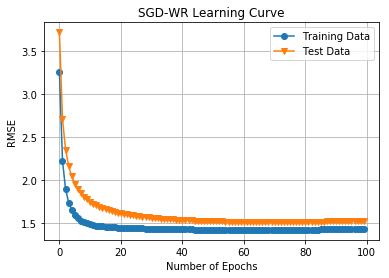

In [75]:
# Check performance by plotting train and test errors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(n_epochs), train_errors, marker='o', label='Training Data');
plt.plot(range(n_epochs), test_errors, marker='v', label='Test Data');
plt.title('SGD-WR Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

The model seems to perform quite well, with a relatively low RMSE after convergence. The performance can be influenced by tweaking the hyperparameters $\lambda$, $\gamma$ and $k$. In order to learn more about hyperparameter tuning you can take a look at one of the previous [posts](http://online.cambridgecoding.com/notebooks/cca_admin/scanning-hyperspace-how-to-tune-machine-learning-models). 

Next you could compare the actual rating with the predicted rating. To do this you first calculate the prediction matrix – for that you can use ``prediction`` function you have implemented above and convert it to a dataframe for the ease of use.<img src="https://latex.codecogs.com/gif.latex?\hat&space;r_{ui}=P_u^TQ_i$&space;&space;$(2)" title="\hat r_{ui}=p_u^Tq_i" /> 

In [ ]:
# Calculate prediction matrix R_hat (low-rank approximation for R)
R = pd.DataFrame(R)
R_hat=pd.DataFrame(prediction(P,Q))

To get an idea of what you achieved, let's compare some of our predictions for user ``17`` with their actual ratings. 

In [ ]:
# Compare true ratings of user 17 with predictions
ratings = pd.DataFrame(data=R.loc[16,R.loc[16,:] > 0]).head(n=5)
ratings['Prediction'] = R_hat.loc[16,R.loc[16,:] > 0]
ratings.columns = ['Actual Rating', 'Predicted Rating']
ratings